In [ ]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns



In [ ]:
# Step 1: Load the Titanic dataset from a public URL

!unzip titanic.zip -d "/content"
df = pd.read_csv("Titanic-Dataset.csv")

df.info()
df.drop(["Cabin"],inplace=True,axis=1)
df['Age'].fillna(df['Age'].mean(),inplace=True)
df.info()

# Select two features: Age and Fare, and the target: Survived
# Handle missing values by dropping rows with NaNs in these columns
# df = df[['Age', 'Fare', 'Survived']].dropna()
# # Extract features and target
# X = df[['Age', 'Fare']].values
# y = df['Survived'].values

# df

Archive:  titanic.zip
replace /content/Titanic-Dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype

/tmp/ipython-input-909264735.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [ ]:
df.head(5)
df.drop(["PassengerId","Name","SibSp","Ticket","Parch","Embarked"],inplace=True,axis=1)


KeyError: "['PassengerId', 'Name', 'SibSp', 'Ticket', 'Parch', 'Embarked'] not found in axis"

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df["Sex"]=le.fit_transform(df["Sex"])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


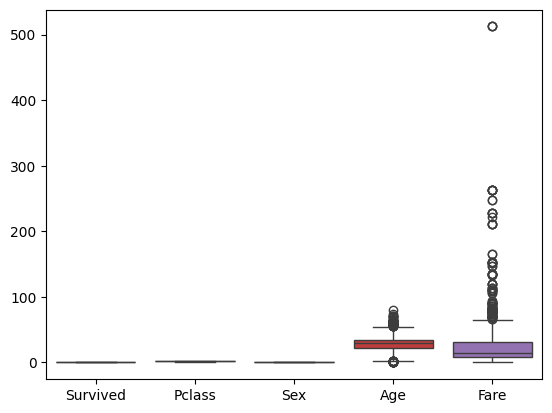

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots for all numeric columns
sns.boxplot(data=df)
plt.show()


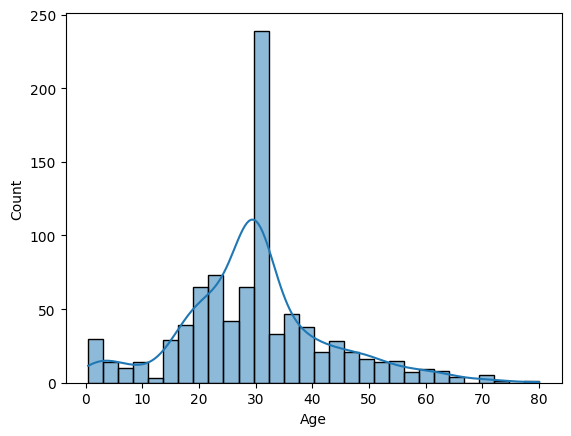

In [ ]:
sns.histplot(df["Age"], kde=True)   # should look bell-shaped
plt.show()

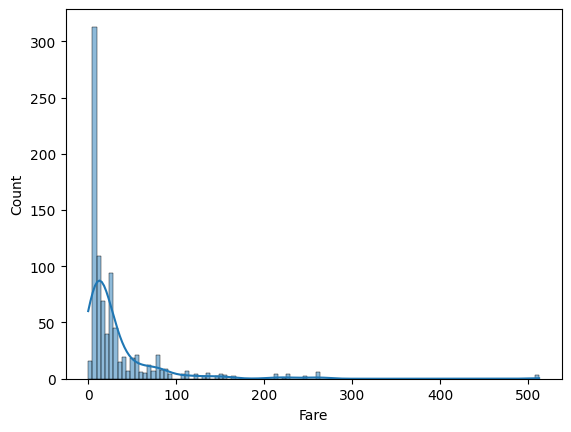

In [ ]:
sns.histplot(df["Fare"], kde=True)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df["Fare"]=scaler.fit_transform(df[["Fare"]])



,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,0.014151
1,1,1,0,38.0,0.139136
2,1,3,0,26.0,0.015469
3,1,1,0,35.0,0.103644
4,0,3,1,35.0,0.015713


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df["Age"]=scaler.fit_transform(df[["Age"]])
df.head(5)

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,-0.592481,0.014151
1,1,1,0,0.638789,0.139136
2,1,3,0,-0.284663,0.015469
3,1,1,0,0.407926,0.103644
4,0,3,1,0.407926,0.015713


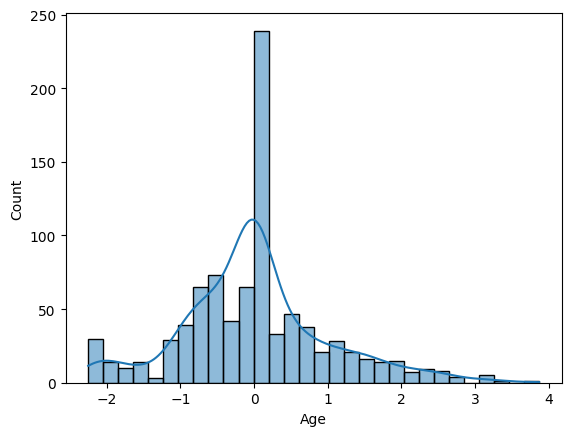

In [ ]:
sns.histplot(df["Age"], kde=True)   # should look bell-shaped
plt.show()

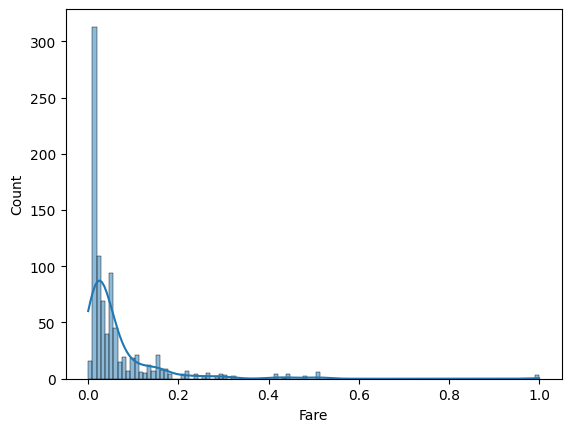

In [ ]:
sns.histplot(df["Fare"],kde=True)
plt.show()

In [ ]:
import numpy as np
df["Fare_log"] = np.log1p(df["Fare"])

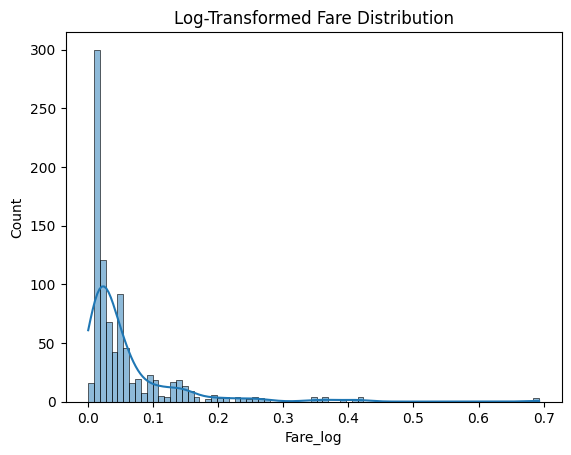

In [ ]:
sns.histplot(df["Fare_log"], kde=True)
plt.title("Log-Transformed Fare Distribution")
plt.show()

<Axes: >

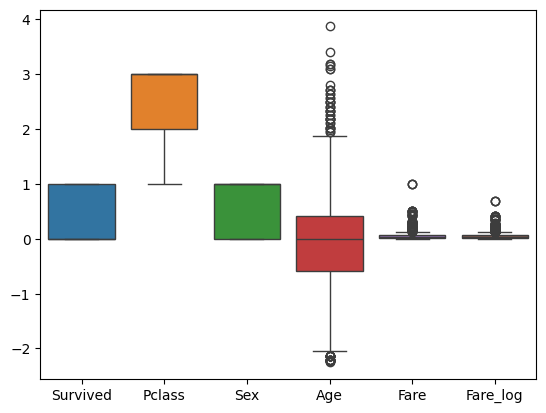

In [ ]:
sns.boxplot(data=df)

In [ ]:
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return np.where(series < lower, lower, np.where(series > upper, upper, series))

# Apply
df['Age_capped'] = cap_outliers(df['Age'])
df['Fare_log_capped'] = cap_outliers(df['Fare_log'])

<Axes: ylabel='Age_capped'>

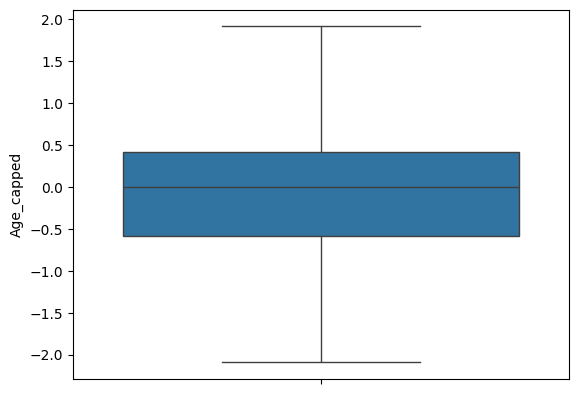

In [ ]:
sns.boxplot(data=df['Age_capped'])

<Axes: ylabel='Fare_log_capped'>

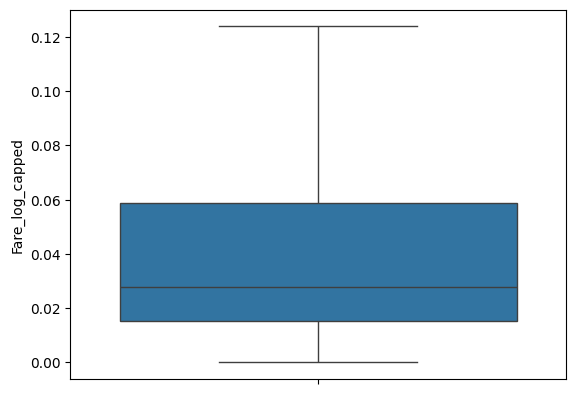

In [ ]:
sns.boxplot(data=df['Fare_log_capped'])

<Axes: >

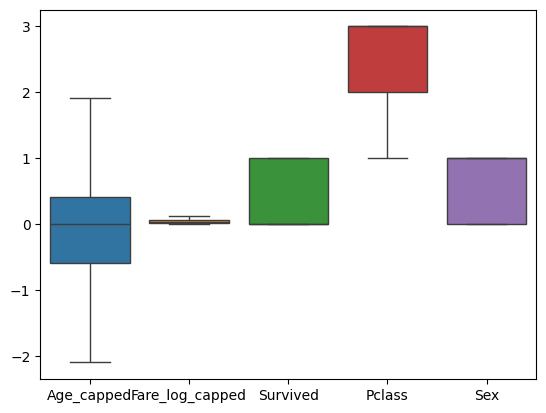

In [ ]:
sns.boxplot(data=df[["Age_capped","Fare_log_capped","Survived","Pclass","Sex"]])

In [ ]:
sns.boxplot(x='Survived', y='Age', data=df)

In [ ]:
X = df.drop("Survived", axis=1)
Y=df["Survived"]

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Step 4: Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = knn.predict(X_test)



Accuracy: 0.81
Precision: 0.82
Recall: 0.69


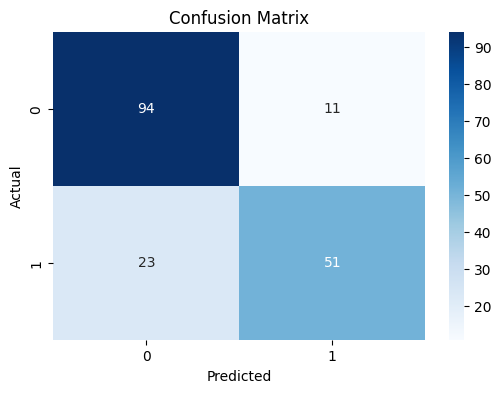

In [ ]:
# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()